In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
Movies_Path = "output/Final_Data.csv"
Movie_DF = pd.read_csv(Movies_Path)

In [3]:
Movie_DF

,Title,Budget,Domestic_Gross,Year,Crit_Rating,Aud_Rating,Runtime_Min,Genre,MPAA_Rating
0,VARSITY BLUES,16000000,52894169,1999,41,76.0,104.0,Drama,R
1,AT FIRST SIGHT,40000000,22365133,1999,32,46.0,128.0,"Drama, Romance",PG-13
2,VIRUS,75000000,14010690,1999,10,21.0,100.0,"Action & Adventure, Horror, Science Fiction & ...",R
3,IN DREAMS,30000000,12017369,1999,24,40.0,120.0,"Horror, Mystery & Suspense",R
4,SHES ALL THAT,10000000,63465522,1999,40,55.0,95.0,"Comedy, Drama, Romance",PG-13
...,...,...,...,...,...,...,...,...,...
2366,BUMBLEBEE,102000000,127195589,2018,92,74.0,119.0,"Action & Adventure, Science Fiction & Fantasy",PG-13
2367,THE MULE,50000000,103804407,2018,70,66.0,116.0,"Drama, Mystery & Suspense",R
2368,HOLMES & WATSON,42000000,30568743,2018,11,26.0,89.0,"Action & Adventure, Comedy, Mystery & Suspense",PG-13
2369,VICE,60000000,47836282,2018,66,59.0,132.0,Drama,R


In [4]:
Run_Bins =  [-1, 74,  89, 104, 119, 134, 149,164,180,  max(Movie_DF["Runtime_Min"])]
Run_Names = ["<75", "75-89", "90-104", "105-119", "120-134", "135-149", "150-164", "165-179", "181+"]

Movie_DF["RunTime"] = pd.cut(Movie_DF["Runtime_Min"], Run_Bins, labels=Run_Names)
Movie_DF["ROI"] =((Movie_DF["Domestic_Gross"] - Movie_DF["Budget"])/Movie_DF["Budget"]) *100
Movie_DF["ROI"] = Movie_DF["ROI"].round()
#Run_Groups = Movie_DF.groupby("RunTime")
#Run_Counter = Run_Groups["Title"].nunique()

#Run_Grouping = pd.DataFrame({"Total Count": age_Counter, "Percent of Players": age_Per})
#age_Grouping["Percent of Players"] = age_Grouping["Percent of Players"].map("{:.2f}%".format)
#age_Grouping
Run_Grouping = pd.DataFrame(Movie_DF)
Run_Grouping= Run_Grouping.dropna()
Run_Grouping["ROI"] = Run_Grouping["ROI"].astype("float")
Run_Grouping

,Title,Budget,Domestic_Gross,Year,Crit_Rating,Aud_Rating,Runtime_Min,Genre,MPAA_Rating,RunTime,ROI
0,VARSITY BLUES,16000000,52894169,1999,41,76.0,104.0,Drama,R,90-104,231.0
1,AT FIRST SIGHT,40000000,22365133,1999,32,46.0,128.0,"Drama, Romance",PG-13,120-134,-44.0
2,VIRUS,75000000,14010690,1999,10,21.0,100.0,"Action & Adventure, Horror, Science Fiction & ...",R,90-104,-81.0
3,IN DREAMS,30000000,12017369,1999,24,40.0,120.0,"Horror, Mystery & Suspense",R,120-134,-60.0
4,SHES ALL THAT,10000000,63465522,1999,40,55.0,95.0,"Comedy, Drama, Romance",PG-13,90-104,535.0
...,...,...,...,...,...,...,...,...,...,...,...
2366,BUMBLEBEE,102000000,127195589,2018,92,74.0,119.0,"Action & Adventure, Science Fiction & Fantasy",PG-13,105-119,25.0
2367,THE MULE,50000000,103804407,2018,70,66.0,116.0,"Drama, Mystery & Suspense",R,105-119,108.0
2368,HOLMES & WATSON,42000000,30568743,2018,11,26.0,89.0,"Action & Adventure, Comedy, Mystery & Suspense",PG-13,75-89,-27.0
2369,VICE,60000000,47836282,2018,66,59.0,132.0,Drama,R,120-134,-20.0


In [5]:
Run_Plot = Run_Grouping.groupby("RunTime")
histo = Run_Plot.apply(lambda x: x.mean())

#Run_Plot.apply()
#Run_Plot.reset_index(drop=True, inplace=True)
#Run_Plot = Run_Grouping.groupby( [ "RunTime"]).count().reset_index()
#test = Run_Plot
#test = test.reset_index
#Run_Plot.aggregate(np.mean)

#est_DF = pd.DataFrame("Run_Plot")
#Run_Plot["ROI"]=Run_Plot["ROI"].astype("float")
#df= pd.DataFrame("Run_Plot")
histo.reset_index(level=0, inplace=True)
histo

,RunTime,Budget,Domestic_Gross,Year,Crit_Rating,Aud_Rating,Runtime_Min,ROI
0,<75,3.712500e+07,3.373550e+07,2005.625000,62.125000,68.500000,60.875000,27.875000
1,75-89,3.805192e+07,5.492613e+07,2007.111111,38.632184,48.340996,85.413793,499.616858
2,90-104,4.261511e+07,6.089192e+07,2007.956151,44.945189,55.269184,96.931790,151.165652
3,105-119,5.099989e+07,6.716704e+07,2008.957910,51.597968,60.865022,111.535559,117.332366
4,120-134,6.381691e+07,8.747466e+07,2008.673352,60.553009,68.601719,125.638968,73.561605
5,135-149,1.005420e+08,1.389183e+08,2008.839161,65.664336,72.867133,140.244755,56.195804
6,150-164,1.427027e+08,2.135811e+08,2008.459459,73.729730,76.432432,155.783784,42.702703
7,165-179,1.304286e+08,1.548911e+08,2006.857143,69.809524,77.809524,168.809524,45.238095
8,181+,1.003333e+08,1.611002e+08,2001.666667,61.833333,74.833333,196.000000,58.500000


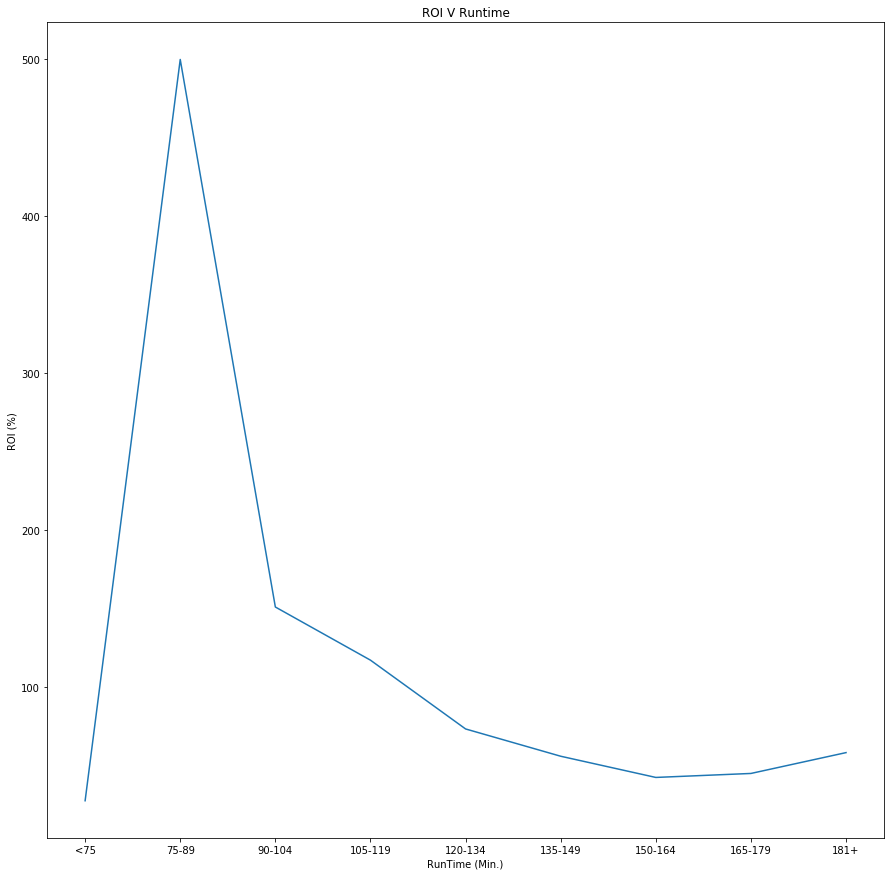

In [6]:
#fig, run_plt = plt.plot(histo["RunTime"],histo["ROI"])



plt.figure(figsize=(15,15))
bessie = plt.plot(histo["RunTime"],histo["ROI"])
plt.xlabel("RunTime (Min.)")
plt.ylabel("ROI (%)")
plt.title("ROI V Runtime")
plt.savefig("Output/ROIV-Run.png")

<Figure size 432x288 with 0 Axes>